In [7]:
import control 
import numpy as np 
import matplotlib.pyplot as plt
import pyfirmata
import time


In [3]:
#https://realpython.com/arduino-python/
#pip install pyfirmata
#### --------------------------- CHECKING CODE --------------------------------

board = pyfirmata.Arduino('/dev/ttyACM1')
idPwm = 8;
while True:
    board.digital[idPwm].write(1)
    time.sleep(1)
    board.digital[idPwm].write(0)
    time.sleep(1)

KeyboardInterrupt: 

In [14]:
board.digital[idPwm].write(0)

In [27]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5/1023;
flgStart = 1;
Ts = 0.01;
idxTimer = 0; 
Tab_valRaw = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(0)
time.sleep(5)

while flgStart == 1:

        board.digital[idPwm].write(1)
        valRaw = potentiometer.read();
        print(valRaw)
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_valRaw.append(valRaw);

        if idxTimer == Ts*100:
            flgStart = 0; 
    

0.0


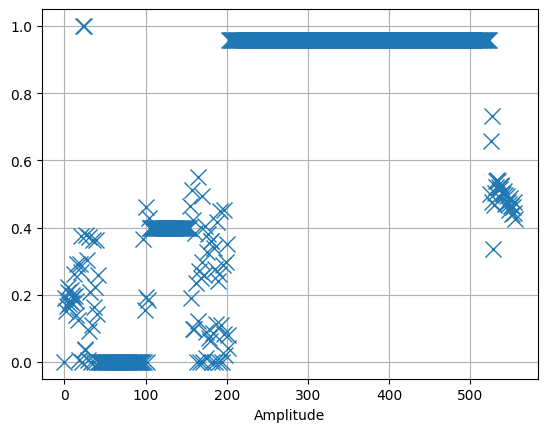

In [22]:
plt.plot(Tab_valRaw,'x',linewidth=2, markersize=12,label='y')
plt.xlabel('Time [s]')
plt.xlabel('Amplitude')
plt.grid()
plt.show()